In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

C:\Users\athen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
happy2020 = pd.read_csv('data/happiness2020.csv')

In [31]:
happy2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


### Data Clean ###
### EDA -- Exploratory Data Analysis ###

* trends and relations and correlations
* dependent vs independent

Text(0.5, 1.0, 'GDP vs Ladder Score')

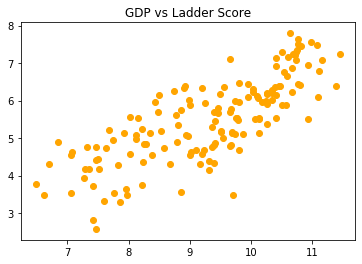

In [32]:
plt.scatter(x = happy2020['Logged GDP per capita'], y = happy2020['Ladder score'], color = 'Orange')
plt.title('GDP vs Ladder Score')

Text(0.5, 1.0, 'Freedom to make life choices vs Ladder Score')

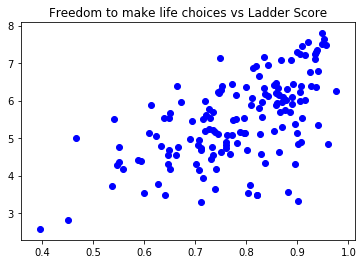

In [33]:
plt.scatter(x = happy2020['Freedom to make life choices'], y = happy2020['Ladder score'], color = 'blue')
plt.title('Freedom to make life choices vs Ladder Score')

Text(0.5, 1.0, 'Social Support vs Ladder Score')

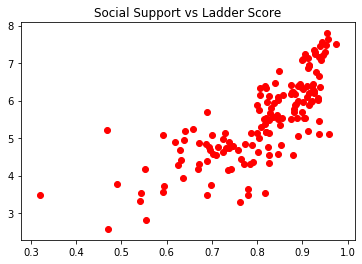

In [34]:
plt.scatter(x = happy2020['Social support'], y = happy2020['Ladder score'], color = 'red')
plt.title('Social Support vs Ladder Score')

Text(0.5, 1.0, 'Healthy Life Expectancy vs Ladder Score')

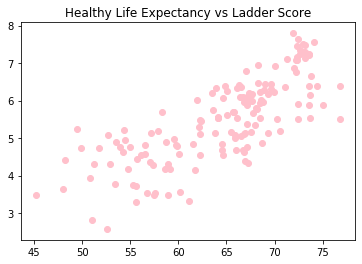

In [35]:
plt.scatter(x = happy2020['Healthy life expectancy'], y = happy2020['Ladder score'], color = 'pink')
plt.title('Healthy Life Expectancy vs Ladder Score')

Text(0.5, 1.0, 'Corruption vs Ladder Score')

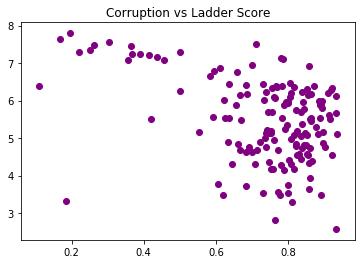

In [36]:
plt.scatter(x = happy2020['Perceptions of corruption'], y = happy2020['Ladder score'], color = 'purple')
plt.title('Corruption vs Ladder Score')

Text(0.5, 1.0, 'GDP vs Corruption')

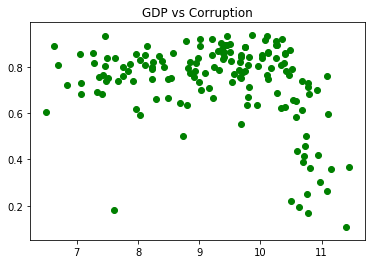

In [37]:
plt.scatter(x = happy2020['Logged GDP per capita'], y = happy2020['Perceptions of corruption'], color = 'green')
plt.title('GDP vs Corruption')

In [40]:
#GDP, social support, life expectancy
gdp_corr = happy2020['Logged GDP per capita'].corr(happy2020['Ladder score'])
gdp_corr

0.7753744007526836

In [41]:
social_corr = happy2020['Social support'].corr(happy2020['Ladder score'])
social_corr

0.7650007567161378

In [42]:
life_corr = happy2020['Healthy life expectancy'].corr(happy2020['Ladder score'])
life_corr

0.7703162898718492

In [43]:
corruption_corr = happy2020['Perceptions of corruption'].corr(happy2020['Ladder score'])
corruption_corr

-0.41830508725590965

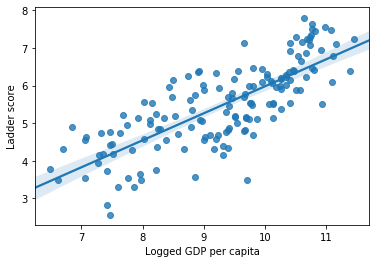

In [44]:
sns.regplot(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

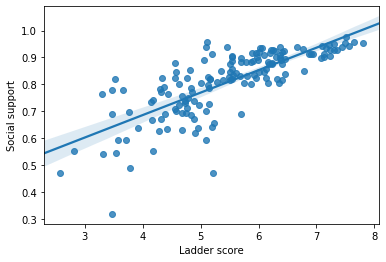

In [45]:
sns.regplot(happy2020['Ladder score'], happy2020['Social support'])

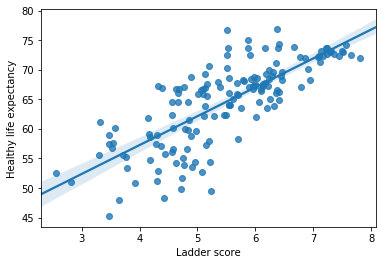

In [46]:
sns.regplot(happy2020['Ladder score'], happy2020['Healthy life expectancy'])

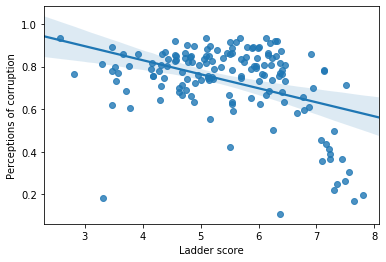

In [47]:
sns.regplot(happy2020['Ladder score'], happy2020['Perceptions of corruption'])

In [48]:
#GDP vs Ladder Score
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

In [49]:
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

0.7177384956354942
-1.1986460619042658
0.7753744007526836
5.983050790573552e-32
0.047570849725377506


In [50]:
def regModel(GDP):
    result = slope*GDP + intercept
    return result

In [51]:
happy2020['Ladder score predicted'] = happy2020.apply(lambda r: regModel(r['Logged GDP per capita']), axis = 1)

In [57]:
#happy2020[['Ladder score', 'Ladder score predicted']]

In [23]:
def percentError(r):
    score = r['Ladder score']
    predicted = r['Ladder score predicted']
    error = (predicted - score)/score
    
    return error

In [55]:
happy2020['Error'] = happy2020.apply(lambda r: percentError(r), axis = 1)

In [58]:
#happy2020[['Ladder score', 'Ladder score predicted', 'Error']]

In [59]:
def r2(original, new):
    avg = original.mean()
    denominator = sum((original - new)**2)
    numerator = sum((original - avg)**2)
    return 1 - (denominator/numerator)

r2(happy2020['Ladder score'], happy2020['Ladder score predicted'])

0.601205461342584

In [26]:
y = happy2020['Ladder score'] #predicted variable
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption']] #variables using to predict

In [27]:
reg = LinearRegression() #create an instance 
reg.fit(x, y) #fitting the data, you have a model after this step

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#reg.predict(x) #feed in x to predict y
happy2020['Predict1'] = pd.Series(reg.predict(x)) #predict the data

In [63]:
happy2020[['Ladder score', 'Ladder score predicted', 'Predict1']]

,Ladder score,Ladder score predicted,Predict1
0,7.8087,6.437565,6.973550
1,7.6456,6.534269,7.093391
2,7.5599,6.682074,7.076252
3,7.5045,6.533234,6.475724
4,7.4880,6.759498,7.193690
...,...,...,...
148,3.4759,3.556486,3.524280
149,3.3123,4.256241,4.974110
150,3.2992,4.446878,4.438550
151,2.8166,4.130820,4.200042


In [62]:
reg.score(x, y) #r2 for this one is 62%

0.6295922583301734